In [1]:
library(knitr)
knitr::opts_chunk$set(tidy=T, 
               fig.width=10,
               fig.height=5,
               fig.align='left',
               warning=FALSE,
               message=FALSE,
               echo=TRUE)
options(width = 120)
library(ggplot2)
library(scales)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


# Ein Kommentar

In [2]:
tossCoin = function(n=30, p=0.5) {

  # create a probability distribution, a vector of outcomes (H/T are coded using 0/1)
  # and their associated probabilities
  outcomes = c(0,1) # sample space
  probabilities = c(1-p,p)
  
  # create a random sample of n flips; this could also be done with
  # the rbinom() function, but sample() is perhaps more useful
  flips = sample(outcomes,n,replace=T,prob=probabilities)
  
  # now create a cumulative mean vector
  cum_sum = cumsum(flips)
  index = c(1:n)
  cum_mean = cum_sum / index
  
  # now combine the index, flips and cum_mean vectors
  # into a data frame and return it
  # return(data.frame(index,flips,cum_mean))
  return(data.frame(index,cum_mean))
}

In [32]:
ggplotCoinTosses = function(n=30, p=.50) {
  # visualize how cumulative average converges on p  
  # roll the dice n times and calculate means
  trial1 = tossCoin(n,p)
  max_y = ceiling(max(trial1$cum_mean))
  if (max_y < .75) max_y = .75 
  min_y = floor(min(trial1$cum_mean))
  if (min_y > .4) min_y = .4
  
  # calculate last mean and standard error
  last_mean = round(trial1$cum_mean[n],9)
  
  # plot the results together
  plot1 = ggplot(trial1, aes(x=index,y=cum_mean)) +
    geom_line(colour = "blue") +
    geom_abline(intercept=p,slope=0, color = 'red', size=.5) +      
    theme(plot.title = element_text(size=rel(1.5)),
          panel.background = element_rect()) +
    labs(x = "n (number of tosses)", 
         y = "Cumulative Average") +
    scale_y_continuous(limits = c(min_y, max_y)) +
    scale_x_continuous(trans = "log10",
                       breaks = trans_breaks("log10",function(x) 10^x),
                       labels = trans_format("log10",math_format(10^.x))) +
    annotate("text",
             label=paste("Cumulative mean =", last_mean,
                         "\nEV =",  p,
                         "\nSample size =", n), 
             y=(max_y - .20), 
             x=10^(log10(n)/2), colour="darkgreen") +
    annotate("text",
           label=paste("P(Heads) with probability for head= ", p), 
           y=(max_y - .80), 
           x=10^(log10(n)/2), colour="red")

  return(plot1)
}  
# call the function; let's use a fair coin



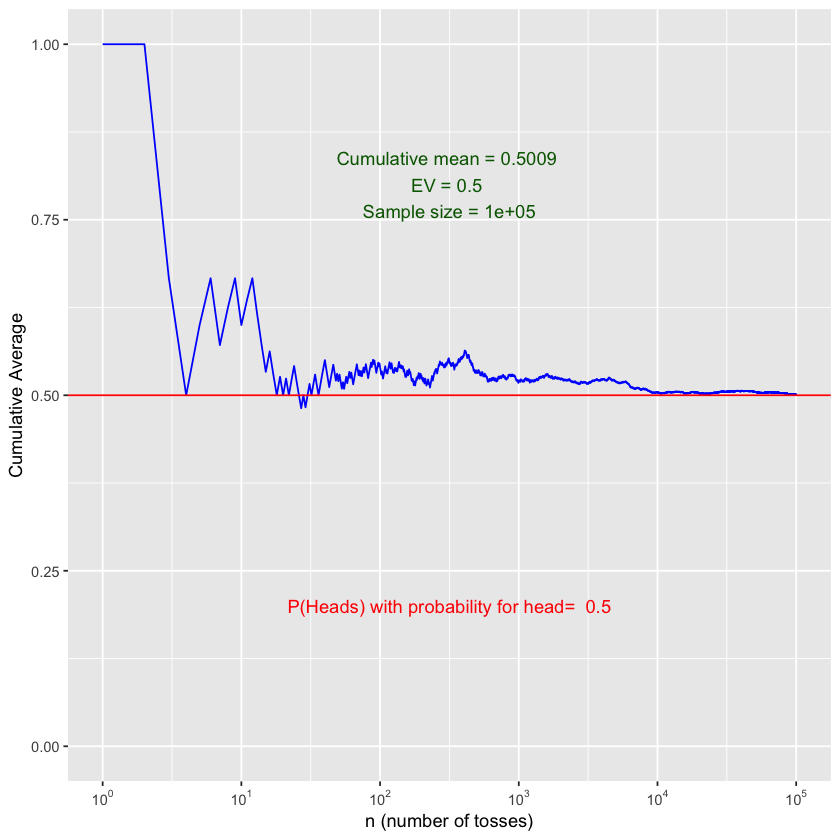

In [33]:
ggplotCoinTosses(100000, .50)

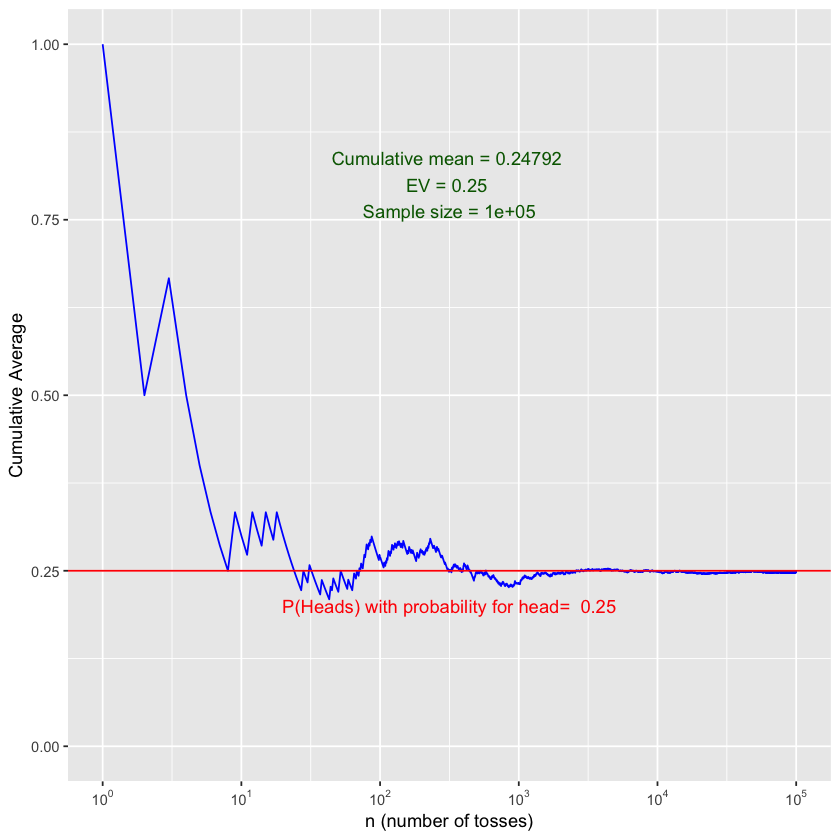

In [34]:
ggplotCoinTosses(100000, .25)